# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from scipy.stats import tmean, trim_mean, percentileofscore
from scipy.stats import fisher_exact
from scipy.interpolate import interp1d

# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. Load the data using the `ks-projects-201801.csv` file

In [47]:
data = pd.read_csv("ks-projects-201801.csv")

Now print the `head` function to examine the dataset.

In [48]:
print(data.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

In [51]:
country_mode = data['country'].mode()[0]
print("Mode of 'country' column:", country_mode)


currency_mode = data['currency'].mode()[0]
print("Mode of 'currency' column:", currency_mode)


Mode of 'country' column: US
Mode of 'currency' column: USD


The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [55]:
percentile_75 = data['goal'].quantile(0.75)

proportion_to_cut = min(percentileofscore(data['goal'], percentile_75) / 100, 0.5)

trimmed_mean = trim_mean(data['goal'], proportiontocut=proportion_to_cut)

print("75th percentile of 'goal' column:", percentile_75)
print("Proportion to cut:", proportion_to_cut)
print("Trimmed mean between 0 and 75th percentile:", trimmed_mean)

75th percentile of 'goal' column: 16000.0
Proportion to cut: 0.5
Trimmed mean between 0 and 75th percentile: 5200.0


#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, see:

* [Wikipedia's explanation](http://b.link/test61)
* [A cool deep explanation](http://b.link/handbook47)
* [An explanation with some important Fisher's considerations](http://b.link/significance76)

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [56]:
data['goal_met'] = np.where(data['usd_pledged_real'] > data['usd_goal_real'], 1, 0)
print(data.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [57]:
data['usd'] = np.where(data['currency'] == 'USD', 1, 0)
print(data.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [59]:
data['goal_met'] = np.where(data['usd_pledged_real'] > data['usd_goal_real'], 1, 0)

data['usd'] = np.where(data['currency'] == 'USD', 1, 0)

contingency_table = pd.crosstab(data['goal_met'], data['usd'])

print("Contingency Table:")
print(contingency_table)

odds_ratio, p_value = fisher_exact(contingency_table)


print("\nFisher's Exact Test:")
print("Odds Ratio:", odds_ratio)
print("P-Value:", p_value)

Contingency Table:
usd           0       1
goal_met               
0         58685  187130
1         24611  108235

Fisher's Exact Test:
Odds Ratio: 1.3791838163150314
P-Value: 2.994e-320


# Challenge 2 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the `interp1d` function from `scipy.interpolate` and first take a sample of 10 rows from `kickstarter`. 

**Make sure there are not duplicated values in `backers`**

In [61]:
sample_size = 10
sample_data = data.sample(n=sample_size, random_state=42)  
sample_data = sample_data.drop_duplicates(subset='backers')
print(sample_data[['name', 'backers']])

                                                     name  backers
113483                                               Deko       41
315283  Westside BJ's: The Gluten-Free, Organic Food T...        9
254054                              Crepe Diem Food Truck       90
44306   Season's End - A horror novel ready for public...        2
220478        Colorado City Arizona Restaurant (Canceled)        3
79222         Faces & Places In Brevard County (Canceled)        0
53451   KiDCASE: The iPad case with built-in parental ...       95
143427  LIBERTY! EQUALITY! AND FIREWORKS!... A Civil R...       35
227329  Wooden iPhone case, cradle, & nose for the 4/4...       30
315289                   Jason Lee Koivula's Solo Project        1


Next, create a linear interpolation of `usd_pledged_real` as a function of the `backers`. Create a function `f` that generates a linear interpolation of `usd_pledged_real` as predicted by the amount of `backers`.

In [62]:
sample_size = 10
sample_data = data.sample(n=sample_size, random_state=42)  
sample_data = sample_data.drop_duplicates(subset='backers')
f = interp1d(sample_data['backers'], sample_data['usd_pledged_real'], kind='linear')
print(f)

Now create a new variable called `x_new`. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function. 

Hint: one option is the `np.arange` function.

In [63]:
min_backers = sample_data['backers'].min()
max_backers = sample_data['backers'].max()
x_new = np.arange(min_backers, max_backers + 1)
usd_pledged_interpolated = f(x_new)
interpolated_data = pd.DataFrame({'backers': x_new, 'usd_pledged_real': usd_pledged_interpolated})
print(interpolated_data)

    backers  usd_pledged_real
0         0          0.000000
1         1         10.000000
2         2         31.090000
3         3        100.000000
4         4        327.666667
..      ...               ...
91       91       5929.600000
92       92       6136.200000
93       93       6342.800000
94       94       6549.400000
95       95       6756.000000

[96 rows x 2 columns]


Plot function `f` for all values of `x_new`. Run the code below.

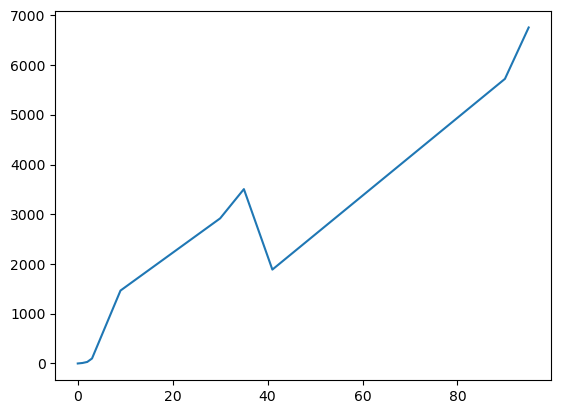

In [64]:
# Run this code:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new))

Next create a function that will generate a cubic interpolation function. Name the function `g`.

In [65]:
g = interp1d(sample_data['backers'], sample_data['usd_pledged_real'], kind='cubic')
print(g)

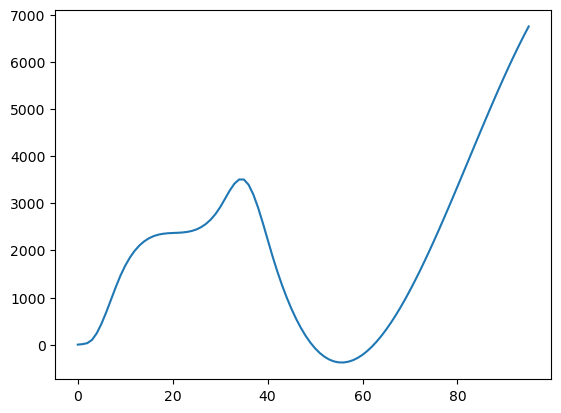

In [66]:
# Run this code:

plt.plot(x_new, g(x_new))

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](http://b.link/binomial55)

* In the cell below, compute the probability that a dice lands on 5 exactly 3 times in 8 tries.


In [67]:
from scipy.stats import binom
n = 8
p = 1/6
k = 3
probability = binom.pmf(k, n, p)

print("Probability:", probability)

Probability: 0.10419048163389724


* Do a simulation for the last event: do a function that simulate 8 tries and return a 1 if the result is 5 exactly 3 times and 0 if not. Now launch your simulation.

In [69]:
import random

def simulate_rolls():
    rolls = [random.randint(1, 6) for _ in range(8)]
    count_of_fives = rolls.count(5)
    return 1 if count_of_fives == 3 else 0


num_simulations = 100000


success_count = sum(simulate_rolls() for _ in range(num_simulations))


simulated_probability = success_count / num_simulations

print("Simulated Probability:", simulated_probability)

Simulated Probability: 0.10318


* Launch 10 simulations and represent the result in a bar plot. Now launch 1000 simulations and represent it. What do you see?

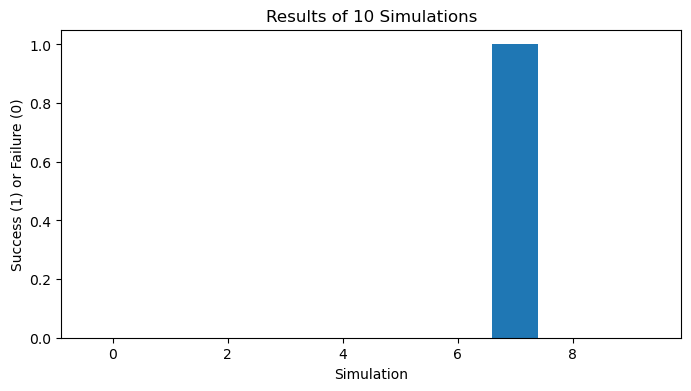

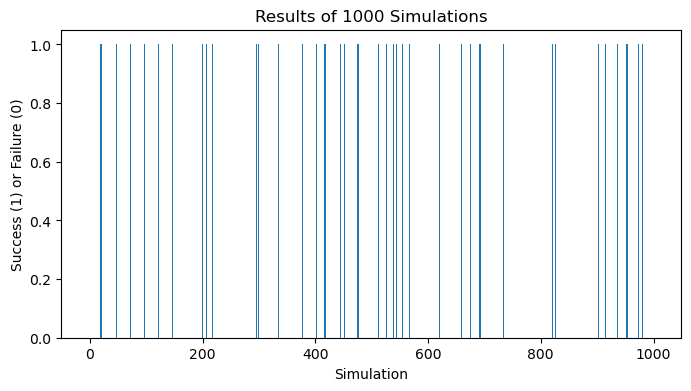

In [70]:
num_simulations_10 = 10

results_10 = [simulate_rolls() for _ in range(num_simulations_10)]

plt.figure(figsize=(8, 4))
plt.bar(range(num_simulations_10), results_10)
plt.xlabel("Simulation")
plt.ylabel("Success (1) or Failure (0)")
plt.title("Results of 10 Simulations")
plt.show()

num_simulations_1000 = 1000

results_1000 = [simulate_rolls() for _ in range(num_simulations_1000)]

plt.figure(figsize=(8, 4))
plt.bar(range(num_simulations_1000), results_1000)
plt.xlabel("Simulation")
plt.ylabel("Success (1) or Failure (0)")
plt.title("Results of 1000 Simulations")
plt.show()

In [ ]:
# the distribution of outcomes tends to align more closely with the calculated probability from the binomial distribution